In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load dataset
data = pd.read_csv(r"C:\Users\DEEPESH.G\Downloads\Housing.csv")

# Encode binary categorical columns
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    data[col] = data[col].map({'yes': 1, 'no': 0})
    
le = LabelEncoder()
data['furnishingstatus'] = le.fit_transform(data['furnishingstatus'])

print(data.tail())


       price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
540  1820000  3000         2          1        1         1          0   
541  1767150  2400         3          1        1         0          0   
542  1750000  3620         2          1        1         1          0   
543  1750000  2910         3          1        1         0          0   
544  1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
540         1                0                0        2         0   
541         0                0                0        0         0   
542         0                0                0        0         0   
543         0                0                0        0         0   
544         0                0                0        0         0   

     furnishingstatus  
540                 2  
541                 1  
542                 2  
543                 0  
544                 

In [29]:

X = data.drop('area', axis=1).values  # All columns except 'area'
Y = data['area'].values               # Target variable: 'area'


In [30]:
# Split dataset into training and testing sets
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_Train, Y_Train)

# Model parameters
print('Slope (Coefficients):', model.coef_)
print('Y-intercept:', model.intercept_)


Slope (Coefficients): [ 5.14291778e-04 -6.02527244e-01 -4.09185080e+02 -2.77371026e+02
  5.78445439e+02  2.31528205e+02 -5.58079061e+02 -8.82566733e+02
  8.69545910e+01  4.26818607e+02  5.40653437e+02 -1.99765015e+01]
Y-intercept: 2884.214678782185


In [31]:
# predict

Y_Pred = model.predict(X_Test)
print("Predicted values:", Y_Pred)

Predicted values: [5281.77181035 6738.94490192 4624.32526432 5325.11378771 3389.94226011
 5314.88965486 5406.00207379 3837.3398956  5502.43921921 6577.03593294
 5053.43828899 4548.94959602 3538.88894023 4139.76552158 4320.26590837
 3523.91411583 4187.49910714 4662.34242296 3068.4447743  5911.51665155
 4592.61433832 3884.47339549 5875.94254037 3428.98386017 5312.21288772
 4933.5481896  6574.96670268 5598.27831679 3944.5332104  5903.86147306
 5395.76716454 3816.64124106 6311.69861776 4871.78472104 2362.28012079
 6566.76168526 7451.95970262 3718.89106236 4395.52058358 3834.95658606
 7081.64440215 3425.50351634 4532.03466206 3785.48333755 5997.05610509
 5765.39322485 4870.77517357 4426.96590211 4487.71370112 7349.03113553
 5045.79276226 4579.45748169 2940.46699949 4734.94579906 4853.18198158
 5695.21372687 5245.36336    5855.1997846  4698.94537463 4364.9224127
 6147.96335316 5089.29698077 3269.36310261 5916.81709471 4081.28931392
 4434.99342492 7403.25192355 4743.34458716 4376.24283434 621

R² Score: 0.31736915179808134
Mean Squared Error: 4447709.915965967


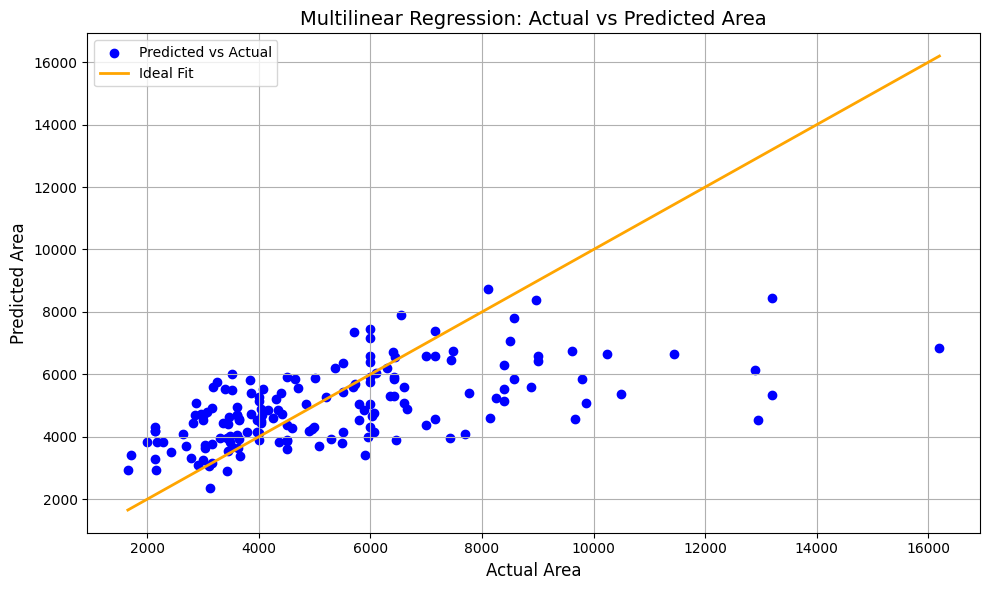

In [ ]:
print("R² Score:", r2_score(Y_Test, Y_Pred)) 
print("Mean Squared Error:", mean_squared_error(Y_Test, Y_Pred))

# Plot Actual vs Predicted Area
plt.figure(figsize=(10, 6))
plt.scatter(Y_Test, Y_Pred, color='blue', label='Predicted vs Actual')
plt.plot([Y_Test.min(), Y_Test.max()], [Y_Test.min(), Y_Test.max()], color='orange', linewidth=2, label='Ideal Fit')
plt.title('Multilinear Regression: Actual vs Predicted Area', fontsize=14)
plt.xlabel('Actual Area', fontsize=12)
plt.ylabel('Predicted Area', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
